In [6]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

In [7]:
import numpy as np
import pandas as pd
import datetime as dt
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [8]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [9]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [10]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [11]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [12]:
# Save references to each table
# Map station class
station = Base.classes.station
# Map measurements class
measurement = Base.classes.measurement

In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [14]:
# Get a list of column names and types of table measurement
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [15]:
# Find the most recent date in the data set.
most_recent_date_row = session.query(measurement.date).order_by(measurement.date.desc()).first()
most_recent_date_row

('2017-08-23',)

One year prior: 2016-08-23 00:00:00


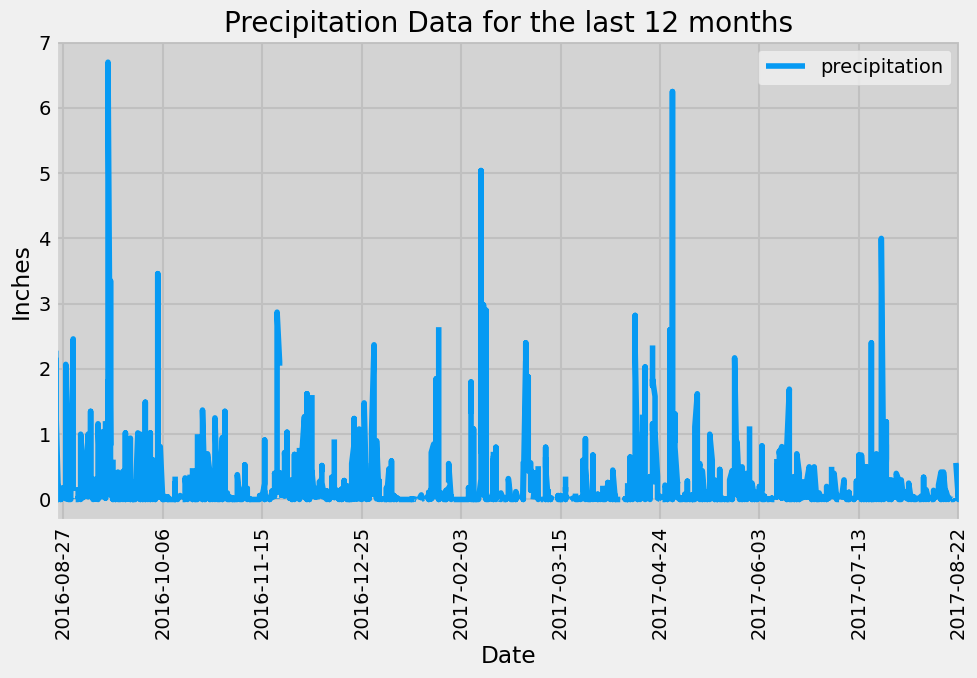

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Extract the date from the row (tuple)
most_recent_date = most_recent_date_row[0]  # This gets the first element of the tuple

# Ensure that most_recent_date is a datetime object
most_recent_date = pd.to_datetime(most_recent_date)

# Calculate the date one year from the last date in data set.
one_year_prior = most_recent_date - relativedelta(months=12)

# Convert one_year_prior to a standard datetime object
one_year_prior = one_year_prior.to_pydatetime()  # Convert to Python datetime

# Print to confirm the date one year prior
print("One year prior:", one_year_prior)

# Perform a query to retrieve the data and precipitation scores
measurement_one_year = session.query(measurement.date, measurement.prcp).filter(measurement.date >= one_year_prior).order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(measurement_one_year, columns=['date', 'prcp'])

# Ensure that 'date' is a datetime object
df['date'] = pd.to_datetime(df['date'])

# Sort the DataFrame by date 
df = df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10,(7)))
plt.plot(df['date'], df['prcp'], color='#069AF3', linestyle='-', label='precipitation')
plt.title("Precipitation Data for the last 12 months")
plt.xlabel("Date")
plt.ylabel("Inches")

# Format the x-axis to show year-month-day
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

# Adjust the x-ticks to make sure they are readable
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))
plt.gca().set_facecolor('lightgray')

# Set x-ticks, y-ticks
plt.xticks(rotation='vertical')
plt.yticks(range(0, int(df['prcp'].max()) + 2, 1))

# Set x and y limits
plt.xlim(df['date'].min(), df['date'].max())
# plt.ylim(0, max(df["prcp"])+1, 1)

# Adjust layout for a tight fit
plt.tight_layout()
plt.grid(True, color="#C0C0C0", linestyle='-', linewidth=1.5)
plt.legend()

# Show the plot
plt.show()


In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [18]:
measurement_one_year_df = pd.DataFrame(measurement_one_year)
measurement_one_year_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [19]:
# Use Pandas to calculate the summary statistics for the precipitation data


# Exploratory Station Analysis

In [20]:
# Get a list of column names and types of table station
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [21]:
# Design a query to calculate the total number of stations in the dataset
total= session.query(func.count(func.distinct(station.station))).all()
total

[(9,)]

In [22]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(station.station, func.count(station.station)).\
    group_by(station.station).\
    order_by(func.count(station.station).desc()).all()
for active_station, count in most_active_stations:
    print(f"{active_station}, {count}")


USC00519523, 1
USC00519397, 1
USC00519281, 1
USC00518838, 1
USC00517948, 1
USC00516128, 1
USC00514830, 1
USC00513117, 1
USC00511918, 1


In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

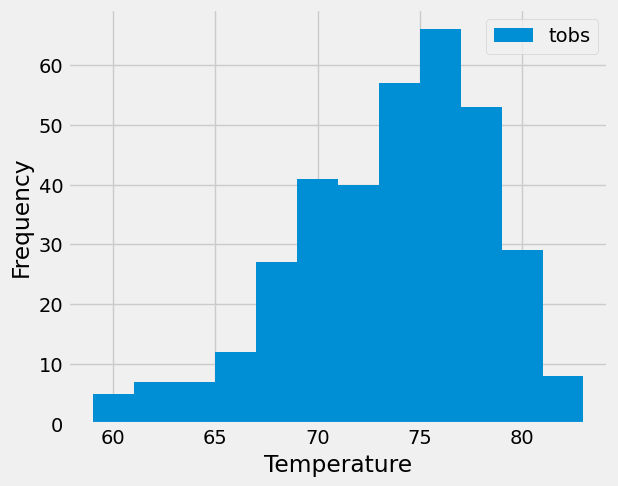

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()